# Exploratory Data Analysis - A Case Study

#### Analyzing TV Shows and movies from Netflix Streaming May 2022




## Introduction

#### In this tutorial, we'll analyze the TV Shows and Movies data of Netflix Streaming dataset. The dataset contains shows and movies title in the Netflix. You can find the dataset here: https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies

## Downloading the Dataset

There are several options for getting the dataset into Jupyter:

    >> Download the CSV manually and upload it via Jupyter's GUI
    >> Use the urlretrieve function from the urllib.request to download CSV files from a raw URL
    >> Use a helper library, e.g., opendatasets, which contains a collection of curated datasets and provides a helper function for direct download.

We'll use the opendatasets helper library to download the files.

Let's import pandas with alias name pd

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('titles.csv')

We load the CSV files using the Pandas library. We'll use the name df for the data frame to indicate this is unprocessed data that we might clean, filter, and modify to prepare a data frame ready for analysis.

In [ ]:
df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5801,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0,0.966,NaN
5802,tm1108171,Edis Starlight,MOVIE,Rising star Edis's career journey with ups and...,2021,NaN,74,"['music', 'documentation']",[],NaN,NaN,NaN,NaN,1.036,8.5
5803,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0,0.709,NaN
5804,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0,2.186,NaN


The Dataset contains over 5000 rows and 5 columns. The columns show the information about the TV Shows and Movies such as release year, age certification, imdb_score, genre etc.

Let's view the list of columns in the dataframe

In [ ]:
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

It can be observed that the columns contain parameters related to the title of the TV Show and Movies of the Netflix Streaming.

In [ ]:
type(df)

pandas.core.frame.DataFrame

Each column is represented using a data structure called Series, which is essentially a numpy array with some additional features

In [ ]:
df['release_year']

0       1945
1       1976
2       1975
3       1979
4       1973
        ... 
5801    2021
5802    2021
5803    2021
5804    2021
5805    2021
Name: release_year, Length: 5806, dtype: int64

Similar to arrays, we can retrieve a specific value using the indexing notation [].

In [ ]:
df['release_year'][546]

2007

There is also an other method to retireve the values at a specific row and column

In [ ]:
df.at[4564, 'release_year']

2019

We can also pass a list of columns to create a subset of the dataset

In [ ]:
sample_df = df[['type','release_year']]


In [ ]:
sample_df

,type,release_year
0,SHOW,1945
1,MOVIE,1976
2,MOVIE,1975
3,MOVIE,1979
4,MOVIE,1973
...,...,...
5801,MOVIE,2021
5802,MOVIE,2021
5803,MOVIE,2021
5804,MOVIE,2021


We also have .loc to access a specific row of the dataframe

In [ ]:
df.loc[4363]

id                                                               tm817284
title                                                          Bridezilla
type                                                                MOVIE
description             After failing to deliver for a demanding bride...
release_year                                                         2019
age_certification                                                     NaN
runtime                                                                93
genres                                     ['romance', 'drama', 'comedy']
production_countries                                               ['ID']
seasons                                                               NaN
imdb_id                                                        tt10589924
imdb_score                                                            6.1
imdb_votes                                                           51.0
tmdb_popularity                       

Let's look at a few rows before and after this index to verify that the values change from NaN to actual numbers. We can do this by passing a range to loc.

In [ ]:
df.loc[354:4521]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
354,tm176528,Memoirs of a Geisha,MOVIE,A sweeping romantic epic set in Japan in the y...,2005,PG-13,145,"['drama', 'romance', 'european']","['FR', 'JP', 'US']",NaN,tt0397535,7.3,146847.0,25.556,7.7
355,tm102337,A Nightmare on Elm Street,MOVIE,The film that brings back horror icon Freddy K...,2010,R,95,"['horror', 'thriller', 'crime', 'drama']",['US'],NaN,tt1179056,5.2,99192.0,46.304,5.5
356,tm36188,Body of Lies,MOVIE,The CIA’s hunt is on for the mastermind of a w...,2008,R,128,"['drama', 'action', 'thriller']","['GB', 'US']",NaN,tt0758774,7.1,224896.0,16.693,6.6
357,tm88382,A Cinderella Story,MOVIE,"Routinely exploited by her wicked stepmother, ...",2004,PG,95,"['romance', 'comedy', 'family']","['CA', 'US']",NaN,tt0356470,5.9,86395.0,31.774,6.5
358,ts31263,The Mole,SHOW,Players working as a team complete a series of...,2001,TV-14,52,['reality'],"['US', 'BE']",5.0,tt0294149,7.6,1104.0,4.376,7.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4517,ts90466,Hong Kong West Side Stories,SHOW,The intimate lives of young men and women from...,2019,TV-MA,23,"['drama', 'comedy']",['HK'],2.0,tt10284430,5.7,6.0,3.240,8.3
4518,tm920320,Lift Like a Girl,MOVIE,An intimate journey into the inner life of an ...,2020,NaN,93,['documentation'],"['DK', 'EG', 'DE']",NaN,tt7240536,7.8,208.0,1.551,7.0
4519,tm476922,Wanted - Matloubin,MOVIE,Wanted is a very human comedy about four old p...,2019,NaN,90,"['comedy', 'drama']",['LB'],NaN,tt9194246,7.2,616.0,NaN,NaN
4520,tm467955,Francesco De Carlo: Cose di Questo Mondo,MOVIE,"Taking to the stage in Milan, Francesco de Car...",2019,NaN,61,['comedy'],[],NaN,tt10087952,6.3,110.0,2.082,7.0


## Data Preparation and Cleaning

### We can observe that there are several columns that define and add value to the title column of the TV Shows and movies.
     We will therefore limit our analysis to the following:
            >> ID, title which is unique to each and every row 
            >> Description about the title such as show type , release year, Run time and genre
            >> Production countries and IMDB Score

In [ ]:
selected_columns = ['id',
                   'title',
                   'type',
                   'release_year',
                    'runtime',
                   'genres',
                   'imdb_score']

In [ ]:
len(selected_columns)

7

We'll make a copy of the data from these columns into a new dataframe df1. We can now modify this dataframe without affecting the original dataframe

In [ ]:
df1 = df[selected_columns].copy()

In [ ]:
df1

,id,title,type,release_year,runtime,genres,imdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,48,['documentation'],NaN
1,tm84618,Taxi Driver,MOVIE,1976,113,"['crime', 'drama']",8.3
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,91,"['comedy', 'fantasy']",8.2
3,tm70993,Life of Brian,MOVIE,1979,94,['comedy'],8.0
4,tm190788,The Exorcist,MOVIE,1973,133,['horror'],8.1
...,...,...,...,...,...,...,...
5801,tm1014599,Fine Wine,MOVIE,2021,100,"['romance', 'drama']",6.9
5802,tm1108171,Edis Starlight,MOVIE,2021,74,"['music', 'documentation']",NaN
5803,tm1045018,Clash,MOVIE,2021,88,"['family', 'drama']",6.5
5804,tm1098060,Shadow Parties,MOVIE,2021,116,"['action', 'thriller']",6.2


We will now look at some basic information about the dataframe

In [ ]:
df1.shape

(5806, 7)

In [ ]:
df1.describe()

,release_year,runtime,imdb_score
count,5806.000000,5806.000000,5283.000000
mean,2016.013434,77.643989,6.533447
std,7.324883,39.474160,1.160932
min,1945.000000,0.000000,1.500000
25%,2015.000000,44.000000,5.800000
50%,2018.000000,84.000000,6.600000
75%,2020.000000,105.000000,7.400000
max,2022.000000,251.000000,9.600000


We have the statistical description about the dataframe in the above cell. We can observe that the column imdb_score has some null values in it. We can either replace the null values with the max or mean value of the column, or we can just remove those certain rows.

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            5806 non-null   object 
 1   title         5805 non-null   object 
 2   type          5806 non-null   object 
 3   release_year  5806 non-null   int64  
 4   runtime       5806 non-null   int64  
 5   genres        5806 non-null   object 
 6   imdb_score    5283 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 317.6+ KB


We can observe that most of the columns are of the datatype = object. We can find only two numeric columns, release_year and imdb_score which is of int data type and float data type respectively. We can also observe that some of the columns contain the null values in them

In [ ]:
df1['genres'].value_counts()

['comedy']                                            510
['drama']                                             350
['documentation']                                     320
['comedy', 'drama']                                   141
['drama', 'comedy']                                   128
                                                     ... 
['drama', 'family', 'comedy', 'music']                  1
['drama', 'thriller', 'western']                        1
['comedy', 'thriller', 'drama', 'action', 'crime']      1
['romance', 'drama', 'history', 'european']             1
['family', 'comedy', 'animation']                       1
Name: genres, Length: 1626, dtype: int64

In [ ]:
import numpy as np

In [ ]:
df1.sample(10)

,id,title,type,release_year,runtime,genres,imdb_score
4240,tm838705,Holiday Rush,MOVIE,2019,94,"['comedy', 'drama', 'romance', 'family']",4.9
2309,ts55978,Samurai Gourmet,SHOW,2017,22,['comedy'],8.1
5241,ts317297,The Orbital Children,SHOW,2022,32,"['action', 'scifi', 'drama', 'fantasy', 'anima...",6.4
3400,tm449195,The Boy Who Harnessed the Wind,MOVIE,2019,113,"['drama', 'history']",7.6
3,tm70993,Life of Brian,MOVIE,1979,94,['comedy'],8.0
3751,ts221363,Criminal: Germany,SHOW,2019,44,"['drama', 'crime']",7.7
100,tm371359,Jaal,MOVIE,1986,159,"['drama', 'thriller', 'action']",5.2
952,ts20261,Madam Secretary,SHOW,2014,43,"['war', 'thriller', 'drama']",7.6
45,tm336403,Khoon Khoon,MOVIE,1973,131,"['drama', 'crime', 'thriller']",5.1
2922,tm430748,Neevevaro,MOVIE,2018,130,"['thriller', 'action', 'drama', 'romance']",6.9


In [ ]:
mean_imdb_score = df['imdb_score'].mean()
mean_imdb_score

6.533446905167521

In [ ]:
df1['imdb_score'].fillna(value=mean_imdb_score, inplace=True)

Here, we are replacing the null values that were found in the imdb_score column with the average of imdb_score column

In [ ]:
df1

,id,title,type,release_year,runtime,genres,imdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,48,['documentation'],6.533447
1,tm84618,Taxi Driver,MOVIE,1976,113,"['crime', 'drama']",8.300000
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,91,"['comedy', 'fantasy']",8.200000
3,tm70993,Life of Brian,MOVIE,1979,94,['comedy'],8.000000
4,tm190788,The Exorcist,MOVIE,1973,133,['horror'],8.100000
...,...,...,...,...,...,...,...
5801,tm1014599,Fine Wine,MOVIE,2021,100,"['romance', 'drama']",6.900000
5802,tm1108171,Edis Starlight,MOVIE,2021,74,"['music', 'documentation']",6.533447
5803,tm1045018,Clash,MOVIE,2021,88,"['family', 'drama']",6.500000
5804,tm1098060,Shadow Parties,MOVIE,2021,116,"['action', 'thriller']",6.200000


## Exploratory Analysis and Visualization

Before we start with Questions, let's look at the columns of our dataframe i.e, title, type, release_year, genre, imdb_score.
It is important to understand about these columns to analyze the data of the TV Shows and Movies in the Netflix Streaming till May 2022.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Type

Let's look at the types of titles in the given dataset

In [ ]:
df1.type

0        SHOW
1       MOVIE
2       MOVIE
3       MOVIE
4       MOVIE
        ...  
5801    MOVIE
5802    MOVIE
5803    MOVIE
5804    MOVIE
5805     SHOW
Name: type, Length: 5806, dtype: object

In [ ]:
df1.type.nunique()

2

So, we can observe that there are two types of 'TYPE' column in the dataset i.e, MOVIE and SHOW

In [ ]:
type_counts = df1['type'].value_counts()
type_counts

MOVIE    3759
SHOW     2047
Name: type, dtype: int64

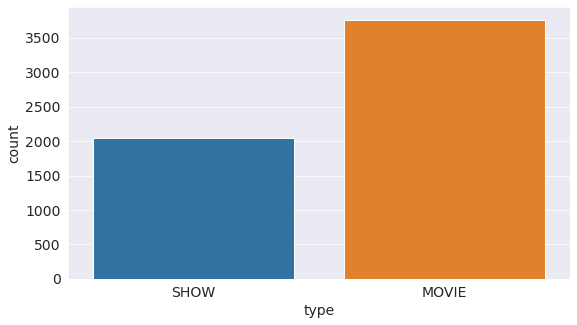

In [ ]:
sns.countplot(data=df1, x='type')
plt.show()

We can observe that most of the streaming types in Netflix are movies. The number of movies in Netflix are comparitvely higher than that of TV Shows.

# Release Year

In [ ]:
df1['release_year']

0       1945
1       1976
2       1975
3       1979
4       1973
        ... 
5801    2021
5802    2021
5803    2021
5804    2021
5805    2021
Name: release_year, Length: 5806, dtype: int64

In [ ]:
release_year_count = df1['release_year'].value_counts().head(10)
release_year_count

2019    848
2020    805
2018    774
2021    758
2017    580
2016    371
2015    236
2022    217
2014    160
2013    142
Name: release_year, dtype: int64

So, we can see that 2019, 2020, 2018, 2021, 2017, 2016, 2015, 2022, 2014, 2013 are the top 10 years with the highest number of releases of TV Shows and Movies of the Netflix Streaming.

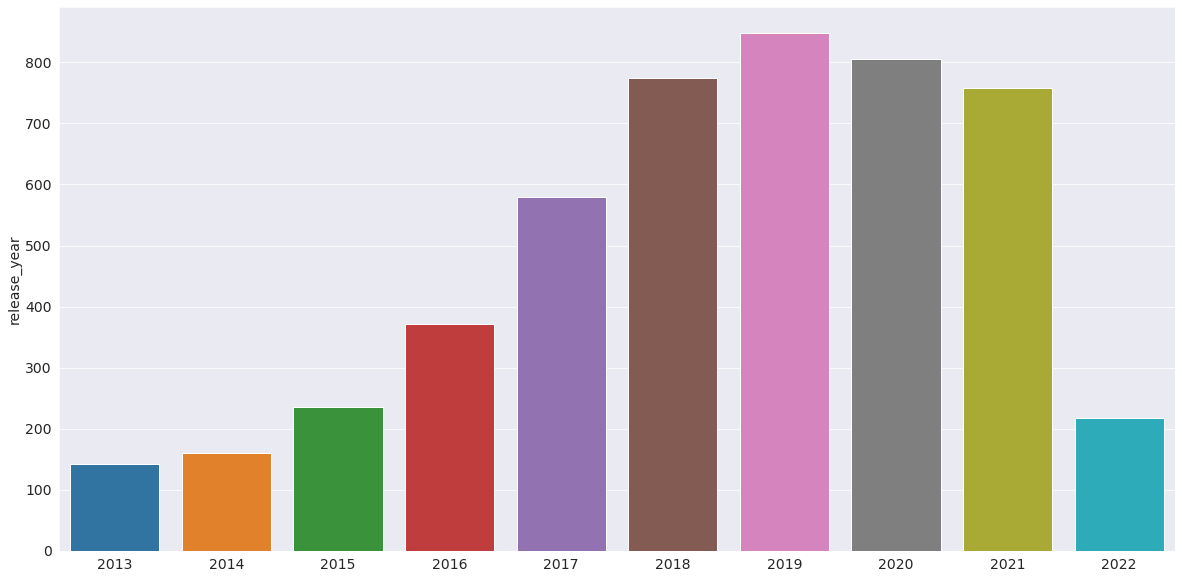

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x=release_year_count.index, y=release_year_count);

It appears that 2019 has the highest number of releases of TV Shows and Movies in Netflix Streaming. We can also observe that there is an increasing graph from 2013 to 2019 regarding the highest number of releases but as it goes to 2022, there is decreasing graph predicting that the highest number of releases will be decreasing. 

# Runtime

Let's look at the column runtime, which shows the running time of TV Shows and movies in the Netflix Streaming.

In [ ]:
df1['runtime']

0        48
1       113
2        91
3        94
4       133
       ... 
5801    100
5802     74
5803     88
5804    116
5805      0
Name: runtime, Length: 5806, dtype: int64

In [ ]:
df1['runtime'].describe()

count    5806.000000
mean       77.643989
std        39.474160
min         0.000000
25%        44.000000
50%        84.000000
75%       105.000000
max       251.000000
Name: runtime, dtype: float64

We can observe that an average of 77 minutes of streaming of TV Shows and Movies has been seen in the Netflix Streaming.

In [ ]:
runtime_count = df1['runtime'].value_counts().head(10)
runtime_count

24     129
90     122
45     108
95     105
100    104
44     102
23      92
25      85
94      84
105     83
Name: runtime, dtype: int64

We can observe from the above information that around 129 TV Shows and Movies have runtime of 24 minutes

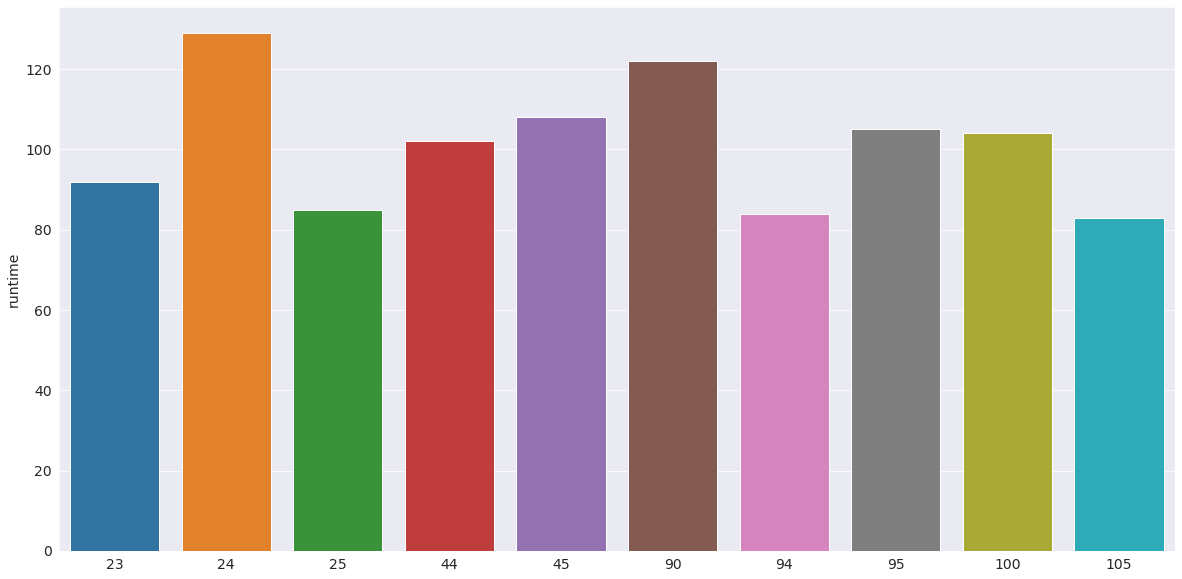

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x=runtime_count.index, y=runtime_count);

So from the above BarPlot, it is clear that most of the movies have a runtime of 24 minutes. But, we can also see that maximum runtime of TV Shows and Movies in the Netflix Streaming was around 250 minutes. So, we can predict that the viewers are interested in watching the TV Shows and Movies in Netflix Streaming which have a runtime of around 24 minutes.

# IMDB

In [ ]:
df1['imdb_score']

0       6.533447
1       8.300000
2       8.200000
3       8.000000
4       8.100000
          ...   
5801    6.900000
5802    6.533447
5803    6.500000
5804    6.200000
5805    8.800000
Name: imdb_score, Length: 5806, dtype: float64

In [ ]:
df1['imdb_score'].describe()

count    5806.000000
mean        6.533447
std         1.107401
min         1.500000
25%         5.900000
50%         6.533447
75%         7.300000
max         9.600000
Name: imdb_score, dtype: float64

We can see that most of the movies have and average imdb_score of 6.533447. The maximum imdb_score recorded is 9.6 and the least imdb_score recorded is 1.5

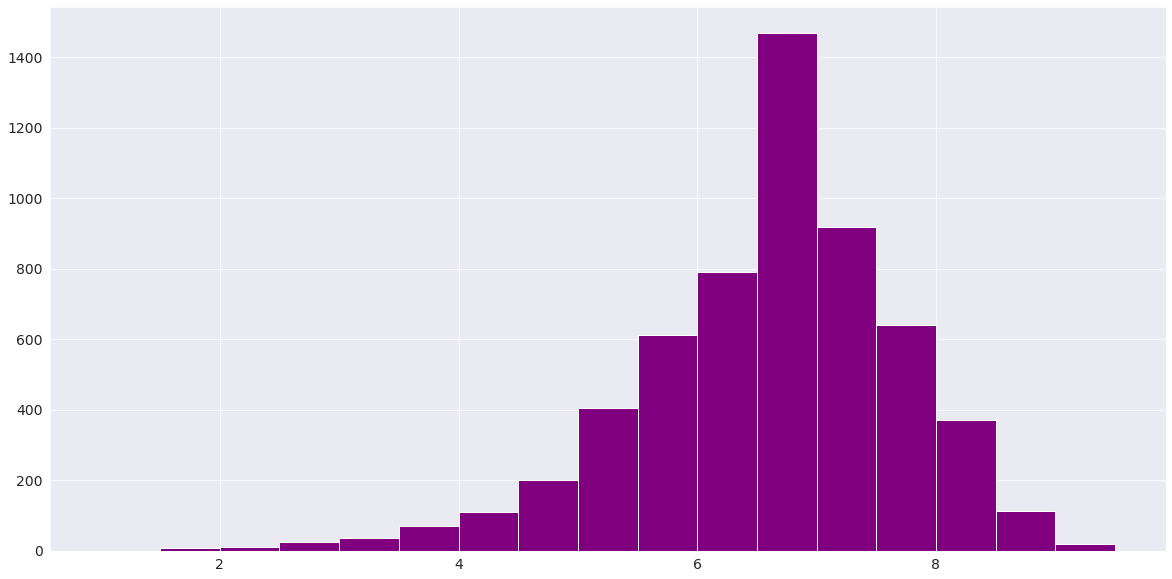

In [ ]:
plt.figure(figsize=(20, 10))
plt.hist(df1['imdb_score'], bins=np.arange(1, 10, 0.5), color='purple');

It appears that large percentage of movies have an imdb_score of 6.5 to 7. A very small percentage of movies are highly rated. So we can predict that the TV Shows and Movies in Netflix Streaming have an average rating of 6.5 to 7 till May 2022.

Something intriguing to figure out would be which genre will tend to be the highest rated.

In [ ]:
df['genres'].value_counts()

['comedy']                                            510
['drama']                                             350
['documentation']                                     320
['comedy', 'drama']                                   141
['drama', 'comedy']                                   128
                                                     ... 
['drama', 'family', 'comedy', 'music']                  1
['drama', 'thriller', 'western']                        1
['comedy', 'thriller', 'drama', 'action', 'crime']      1
['romance', 'drama', 'history', 'european']             1
['family', 'comedy', 'animation']                       1
Name: genres, Length: 1626, dtype: int64

It appears to be our dataset generally contains films or TV shows that are comedies, dramatizations, or documentations, so we should perceive how those analyze in IMDB appraisals.

## Asking and Answering Questions

We've already gained several insights about the respondents and the programming community by exploring individual columns of the dataset. Let's ask some specific questions and try to answer them using data frame operations and visualizations.



#### Q1: What is the total number of runtime of all TV Shows and Movies?

In [ ]:
df1

,id,title,type,release_year,runtime,genres,imdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,48,['documentation'],6.533447
1,tm84618,Taxi Driver,MOVIE,1976,113,"['crime', 'drama']",8.300000
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,91,"['comedy', 'fantasy']",8.200000
3,tm70993,Life of Brian,MOVIE,1979,94,['comedy'],8.000000
4,tm190788,The Exorcist,MOVIE,1973,133,['horror'],8.100000
...,...,...,...,...,...,...,...
5801,tm1014599,Fine Wine,MOVIE,2021,100,"['romance', 'drama']",6.900000
5802,tm1108171,Edis Starlight,MOVIE,2021,74,"['music', 'documentation']",6.533447
5803,tm1045018,Clash,MOVIE,2021,88,"['family', 'drama']",6.500000
5804,tm1098060,Shadow Parties,MOVIE,2021,116,"['action', 'thriller']",6.200000


To calculate the total number of runtime, we use the sum function

In [ ]:
df1['runtime'].sum()

450801

It appears that all the TV Shows and Movies of Netflix Streaming have a total runtime of 450801 minutes. So, we can say that the Netflix Streaming has 313 days of content (TV Shows and Movies).

#### Q2: Which are the top ten movies with highest imdb score?

In [ ]:
movies_df = df1[df1['type']=='MOVIE']

We create a subset of dataframe which contain only Movies of the Netflix Streaming.

We sort the dataframe using sort_values in decreasing order so that the highest rated movie is at the top

In [ ]:
movies_df.sort_values('imdb_score', ascending=False).head(10)

,id,title,type,release_year,runtime,genres,imdb_score
3352,tm853783,David Attenborough: A Life on Our Planet,MOVIE,2020,83,['documentation'],9.0
2814,tm432327,C/o Kancharapalem,MOVIE,2018,152,['drama'],9.0
25,tm76557,No Longer Kids,MOVIE,1979,235,"['comedy', 'drama']",9.0
876,tm166740,Chhota Bheem & Krishna in Mayanagari,MOVIE,2011,66,"['animation', 'action', 'fantasy']",9.0
260,tm92641,Inception,MOVIE,2010,148,"['scifi', 'music', 'thriller', 'action']",8.8
108,tm122434,Forrest Gump,MOVIE,1994,142,"['drama', 'romance', 'comedy']",8.8
4473,tm907872,Sky Tour: The Movie,MOVIE,2020,94,"['documentation', 'music']",8.8
4944,tm1038686,Bo Burnham: Inside,MOVIE,2021,87,"['comedy', 'drama', 'music', 'reality']",8.7
519,tm25842,A Lion in the House,MOVIE,2006,225,['documentation'],8.7
85,tm45720,Bye Bye London,MOVIE,1982,170,"['comedy', 'drama']",8.7


We can observe that the movie with the title David Attenborough: A Life on Our Planet which was released in the year 2020 having a runtime of 83 minutes is the highest rated movie. And, the movie with the title Bye Bye London which was released in the year 1982 having a runtime of 170 minutes stands at the 10th position.

#### Q3: Which are the TV Shows having the highest runtime having imdb_score greater than 7.5?

We first create a subset of the dataframe with type=SHOW

In [ ]:
show_df = df1[df1['type']=='SHOW']
show_df

,id,title,type,release_year,runtime,genres,imdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,48,['documentation'],6.533447
5,ts22164,Monty Python's Flying Circus,SHOW,1969,30,"['comedy', 'european']",8.800000
29,ts45948,Monty Python's Fliegender Zirkus,SHOW,1972,43,['comedy'],8.100000
47,ts20681,Seinfeld,SHOW,1989,24,['comedy'],8.900000
55,ts22082,Knight Rider,SHOW,1982,51,"['action', 'scifi', 'crime', 'drama']",6.900000
...,...,...,...,...,...,...,...
5793,ts296698,Glimpses of a Future,SHOW,2021,4,[],6.533447
5794,ts297061,Masameer County,SHOW,2021,23,[],6.533447
5796,ts286386,The Big Day,SHOW,2021,45,"['reality', 'romance']",4.600000
5799,ts307884,HQ Barbers,SHOW,2021,24,['comedy'],6.533447


We are checking for the condition of imdb_score having greater than 7.5

In [ ]:
imdb_score_cond = df1.imdb_score>7.5

Now, using the condition variable, We are going to create a new subset of this dataframe such that it has only TV Shows with imdb_score greater than 7.5

In [ ]:
new_show_df = show_df[imdb_score_cond]
new_show_df

/tmp/ipykernel_683/1918284302.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_show_df = show_df[imdb_score_cond]


,id,title,type,release_year,runtime,genres,imdb_score
5,ts22164,Monty Python's Flying Circus,SHOW,1969,30,"['comedy', 'european']",8.8
29,ts45948,Monty Python's Fliegender Zirkus,SHOW,1972,43,['comedy'],8.1
47,ts20681,Seinfeld,SHOW,1989,24,['comedy'],8.9
106,ts22176,Stargate SG-1,SHOW,1997,44,"['scifi', 'drama', 'action']",8.4
107,ts21223,Pokémon,SHOW,1997,22,"['scifi', 'action', 'comedy', 'fantasy', 'anim...",7.6
...,...,...,...,...,...,...,...
5609,ts316882,Reasonable Doubt: A Tale of Two Kidnappings,SHOW,2021,47,"['crime', 'documentation']",7.6
5680,ts288861,Let's Eat,SHOW,2021,60,"['drama', 'comedy']",8.2
5747,ts285422,Newton's Cradle,SHOW,2021,41,"['drama', 'thriller']",8.0
5751,ts297685,I Need Romance,SHOW,2021,45,"['drama', 'romance']",7.8


Now, we sort the values of the column runtime of the new dataframe such that the top ten shows with the highest runtime is displayed.

In [ ]:
new_show_df.sort_values('runtime', ascending=False).head(10)

,id,title,type,release_year,runtime,genres,imdb_score
388,ts15986,Dead Set,SHOW,2008,141,"['scifi', 'thriller', 'comedy', 'drama', 'horr...",7.6
4997,ts108042,Maya and the Three,SHOW,2021,131,"['comedy', 'drama', 'family', 'fantasy', 'anim...",8.1
1408,ts78325,Sinatra: All or Nothing at All,SHOW,2015,122,"['documentation', 'music']",8.0
4403,ts269844,Paava Kadhaigal,SHOW,2020,118,"['drama', 'family']",8.1
1422,ts37660,Reply 1988,SHOW,2015,95,"['comedy', 'drama', 'family', 'romance']",9.2
4939,ts311989,jeen-yuhs,SHOW,2022,93,"['documentation', 'music']",8.1
1362,ts52830,Gilmore Girls: A Year in the Life,SHOW,2016,92,"['comedy', 'drama']",7.6
2432,ts76478,Prison Playbook,SHOW,2017,91,"['comedy', 'drama']",8.5
3677,ts223192,Hospital Playlist,SHOW,2020,90,"['comedy', 'drama']",8.8
2878,ts75320,A Boy Named Flora A,SHOW,2017,89,"['drama', 'comedy']",7.9


We can now observe that the show with the title Dead Set which was released in the year 2008 having an imdb score of 7.6 has the highest runtime of 141 minutes. And, the show with the title A Boy Named Flora A which was released in the year 2017 having an imdb_score of 7.9 has the runtime of 89 minutes standing in the 10th position.

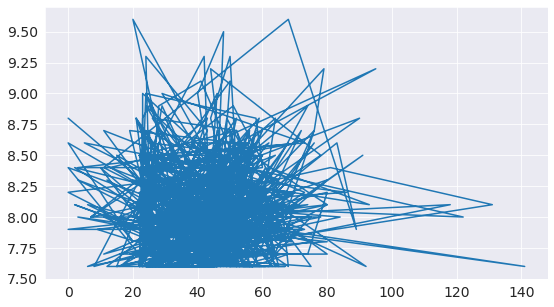

In [ ]:
plt.plot(new_show_df['runtime'], new_show_df['imdb_score']);

The output is not very informative as there are too many combinations of the two properties within the dataset. There doesn't seem to be simple relationship between them.

We can use a scatter plot to visualize how runtime & imdb_score vary using the scatterplot function from the seaborn module (imported as sns).

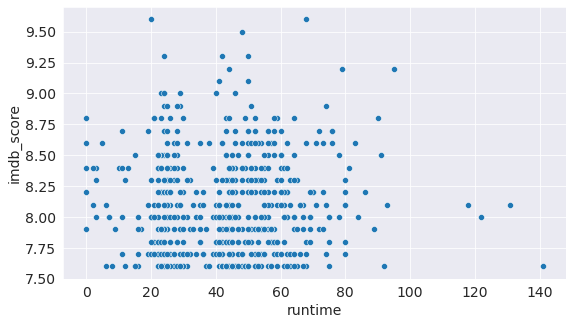

In [ ]:
sns.scatterplot(x=new_show_df['runtime'], y=new_show_df['imdb_score']);

Perhaps the TV Show with high runtime do not have a good imdb_score comparitively. The TV Shows having a runtime of 20 minutes to 65 minutes are highly rated.

#### Q4: What is the name of the TV Show or Movie which is highest imdb_score and was released in the year 2020

Let's create a subset of the dataframe which corresponds to the year 2020

In [ ]:
latest_df = df1[df1['release_year']==2020]
latest_df

,id,title,type,release_year,runtime,genres,imdb_score
3180,ts216679,Bridgerton,SHOW,2020,62,"['drama', 'romance']",7.300000
3187,tm681578,The Rental,MOVIE,2020,88,"['thriller', 'drama', 'horror']",5.700000
3189,ts87453,Space Force,SHOW,2020,30,['comedy'],6.700000
3191,tm832345,365 Days,MOVIE,2020,114,"['romance', 'drama', 'european']",3.300000
3192,ts89259,The Queen's Gambit,SHOW,2020,56,"['drama', 'sport']",8.600000
...,...,...,...,...,...,...,...
4820,tm915354,Girl's Revenge,MOVIE,2020,81,['drama'],5.700000
4823,tm921230,Story of Kale: When Someone's in Love,MOVIE,2020,77,"['drama', 'romance']",6.400000
4827,tm840236,Milea,MOVIE,2020,99,"['romance', 'drama']",6.400000
4829,ts224956,What the Love! with Karan Johar,SHOW,2020,47,['reality'],6.533447


After creating the subset of the dataframe, let's sort the dataframe by using sort_values

In [ ]:
latest_df.sort_values('imdb_score', ascending=False).head(1)

,id,title,type,release_year,runtime,genres,imdb_score
3196,ts81120,The Last Dance,SHOW,2020,50,"['documentation', 'history', 'sport']",9.1


We can see that the title The Last Dance which is of the type SHOW having a runtime of 50 minutes has the highest imdb_score in the year 2020

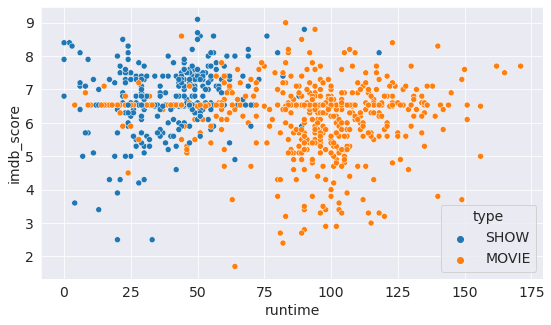

In [ ]:
sns.scatterplot(x=latest_df['runtime'], y=latest_df['imdb_score'], hue=latest_df['type']);

The scatter plot clearly says that TV Show has the highest imdb_score.There are very less TV Shows released in the year 2020 with high runtime.

In [ ]:
df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5801,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0,0.966,NaN
5802,tm1108171,Edis Starlight,MOVIE,Rising star Edis's career journey with ups and...,2021,NaN,74,"['music', 'documentation']",[],NaN,NaN,NaN,NaN,1.036,8.5
5803,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0,0.709,NaN
5804,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0,2.186,NaN


## Inferences and Conclusions

We've drawn many inferences from the survey. Here's a summary of a few of them:

- Based on the dataset, we came to know that as the years passed, there was rapid change in the release of TV Shows and Movies in the Netflix Streaming.

- The count of movies is comparitively more than the TV Shows on the Netflix Streaming. We can say that the number of movies released are almost twice more than the release of TV Shows.


- There was a major increase in the release of TV Shows and Movies till 2019, but after this the release of TV Shows and Movies reduced till 2022.

- The most number of released TV Shows and Movies fall under the genre of 'Comedy'.

- The Analysis says that most of the TV Shows and movies in Netflix Streaming have a runtime of around 24 minutes.

- The average IMDB Score of TV Shows and Movies is around 6.5 in Netflix Streaming.

## References and Future Work

Check out the following resources to learn more about the dataset and tools used in this notebook:

- Dataset : https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html